In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

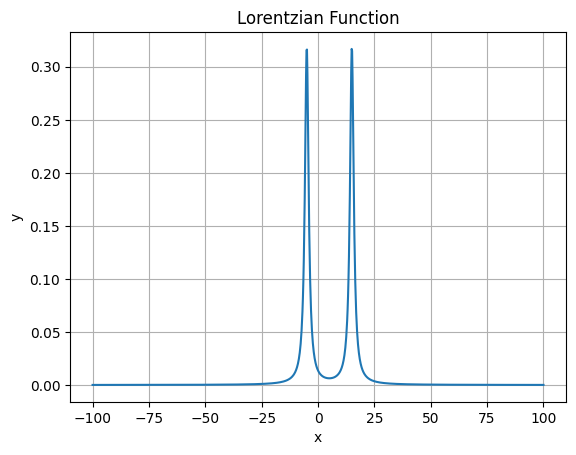

In [2]:
def pascal(x):
        triangle = torch.zeros((x, x))
        for i in range(x):
            triangle[i, 0] = 1
            triangle[i, i] = 1
            if i > 0:
                for j in range(1, i):
                    triangle[i, j] = triangle[i - 1, j - 1] + triangle[i - 1, j]
        return triangle[-1]

def lorentzian(x, mean, variance):   
    return 1 / (torch.pi * variance * (1 + ((x - mean) / variance) ** 2))
def gauss(x, mean, variance):
    return 1/(variance*(2*torch.pi)**(1/2))*torch.exp(-1/2*((x-mean)/variance)**2)

def multiplet(x, mult, mean, sigma, spacing, type='lorentz'):
    triangle = pascal(mult)
    t_max = max(triangle)
    triangle = [t/t_max for t in triangle]
    y = torch.zeros(len(x),dtype=float)

    if len(triangle)%2 == 0:
        space = -1*len(triangle)/2*spacing+spacing/2
    else:
        space = -1*(len(triangle)-1)/2*spacing
    for i,size in enumerate(triangle):
        if type == 'lorentz':
            y += lorentzian(x, mean+space, sigma)*size
        else:
            y += gauss(x, mean+space, sigma)*size
        space +=  spacing
    return y

x = torch.linspace(-100,100,1000)
Y = multiplet(x, 2, 5, 1, 20)

plt.plot(x, Y)
plt.title('Lorentzian Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()